# 자동차 평가 데이터 딥러닝 분류하기

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [21]:
# 데이터 불러오기

file_path = 'D:/K1_nam4/인공지능개론/artificial-intelligence/AI_class/artificial-intelligence/week5/dataFrame/car_evaluation.csv'

In [22]:
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_df = pd.read_csv(file_path, names=column_names)
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [23]:
# 데이터 전처리

car_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Length: 1728, dtype: bool

In [24]:
car_df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [25]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [26]:
# # 레이블 인코딩
# le = LabelEncoder()
# car_df['buying'] = le.fit_transform(car_df['buying'])
# car_df['maint'] = le.fit_transform(car_df['maint'])
# car_df['doors'] = le.fit_transform(car_df['doors'])
# car_df['persons'] = le.fit_transform(car_df['persons'])
# car_df['lug_boot'] = le.fit_transform(car_df['lug_boot'])
# car_df['safety'] = le.fit_transform(car_df['safety'])
# car_df['class'] = le.fit_transform(car_df['class'])

In [27]:
car_df.value_counts()

buying  maint  doors  persons  lug_boot  safety  class
vhigh   vhigh  5more  4        big       low     unacc    1
                                         high    unacc    1
                      2        small     med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
                                                         ..
high    high   2      2        med       low     unacc    1
                                         high    unacc    1
                               big       med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
Name: count, Length: 1728, dtype: int64

### 레이블 인코딩

In [28]:
# 레이블 인코딩
label_encoder = LabelEncoder()
for col in car_df.columns:
    car_df[col] = label_encoder.fit_transform(car_df[col])
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [29]:
car_df.value_counts()

buying  maint  doors  persons  lug_boot  safety  class
3       3      3      1        0         1       2        1
                                         0       2        1
                      0        2         2       2        1
                                         1       2        1
                                         0       2        1
                                                         ..
0       0      0      0        1         1       2        1
                                         0       2        1
                               0         2       2        1
                                         1       2        1
                                         0       2        1
Name: count, Length: 1728, dtype: int64

In [40]:
# 데이터 분할
X = car_df.drop('class', axis=1)
y = car_df['class']

0      1      2      3    
False  False  True   False    1210
True   False  False  False     384
False  True   False  False      69
       False  False  True       65
Name: count, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

In [47]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [48]:
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# 모델링
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [55]:
model = keras.Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [56]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4807 - loss: 1.2567 - val_accuracy: 0.6534 - val_loss: 1.0080
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7272 - loss: 0.8698 - val_accuracy: 0.6534 - val_loss: 0.8425
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7078 - loss: 0.7199 - val_accuracy: 0.6715 - val_loss: 0.7664
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7231 - loss: 0.6722 - val_accuracy: 0.6931 - val_loss: 0.7230
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7716 - loss: 0.5977 - val_accuracy: 0.7040 - val_loss: 0.6858
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7441 - loss: 0.5820 - val_accuracy: 0.7148 - val_loss: 0.6528
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.5243 - val_accuracy: 0.7329 - val_loss: 0.6131
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.4995 - val_accuracy: 0.7581 - v

In [57]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.1399 
Test accuracy: 0.9624


In [58]:
# 예측
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test.values, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

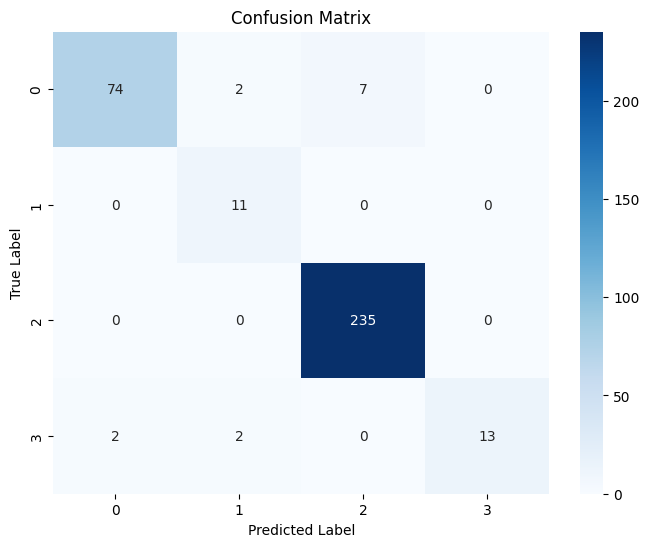

In [60]:
# 혼동 행렬
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [61]:
# 분류 리포트
report = classification_report(true_classes, predicted_classes, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

         acc       0.97      0.89      0.93        83
        good       0.73      1.00      0.85        11
       unacc       0.97      1.00      0.99       235
       vgood       1.00      0.76      0.87        17

    accuracy                           0.96       346
   macro avg       0.92      0.91      0.91       346
weighted avg       0.97      0.96      0.96       346



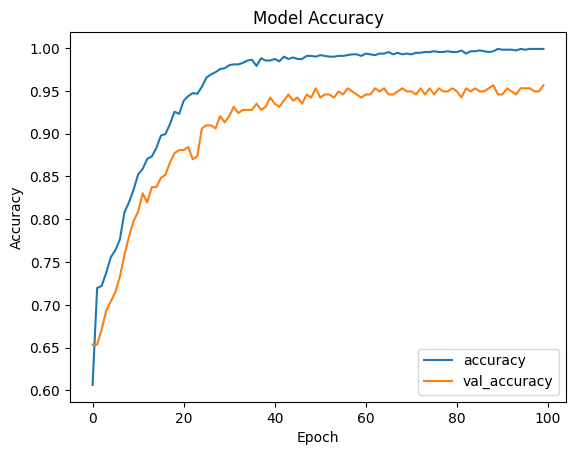

In [62]:
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

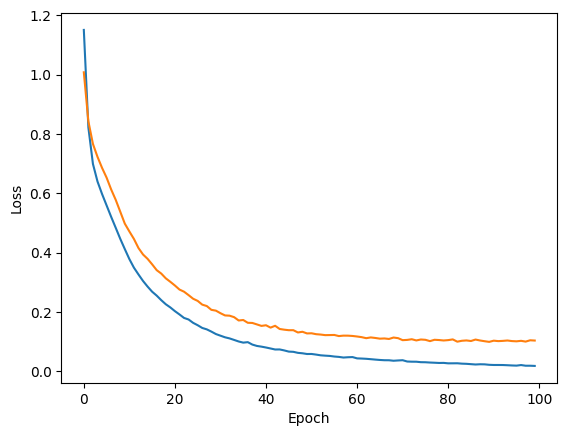

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()